In [1]:
import artm
import os
import matplotlib.pyplot as plt

In [2]:
# batch_vectorizer = artm.BatchVectorizer(data_path='C:\\NIVC\\Nivc_test_corpus', data_format='bow_uci', collection_name='kos', target_folder='kos')
path = 'C:\\NIVC\\Nivc_BigARTM_corpus\\unary_comm\\'
subd = "golosislamacom"
batch_vectorizer = artm.BatchVectorizer(data_path=path + "\\" + subd + "\\" + "batches",
                                            data_format='batches')

In [3]:
modelARTM = artm.ARTM(num_topics=100,
                      scores=[artm.PerplexityScore(name='PerplexityScore', use_unigram_document_model=False, dictionary=batch_vectorizer.dictionary),
                              artm.SparsityPhiScore(name='SparsityPhiScore'),
                              artm.SparsityThetaScore(name='SparsityThetaScore'),
                              artm.TopTokensScore(name='TopTokensScore', num_tokens=6)], 
                      cache_theta=True)

In [4]:
#modelARTM.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.2))
#modelARTM.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.2))
#modelARTM.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=2.5e+5))

In [5]:
modelARTM.initialize(dictionary=batch_vectorizer.dictionary)

In [6]:
modelARTM.num_document_passes = 1

In [7]:
modelARTM.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes = 1)

In [8]:
print "===========================ARTM PerplexityScore start===================================="
print modelARTM.score_tracker['PerplexityScore'].value
print "===========================ARTM PerplexityScore end======================================"

===========================ARTM PerplexityScore start====================================
[113009.3813697068]
===========================ARTM PerplexityScore end======================================


In [9]:
print 'Sparsity Phi: {0:.3f} (ARTM)'.format(
    modelARTM.score_tracker['SparsityPhiScore'].last_value)

print 'Sparsity Theta: {0:.3f} (ARTM)'.format(
    modelARTM.score_tracker['SparsityThetaScore'].last_value)

# print 'Kernel contrast: {0:.3f} (ARTM)'.format(
#     modelARTM.score_tracker['TopicKernelScore'].last_average_contrast)
# 
# print 'Kernel purity: {0:.3f} (ARTM)'.format(
#     modelARTM.score_tracker['TopicKernelScore'].last_average_purity)

print 'Perplexity: {0:.3f} (ARTM)'.format(
    modelARTM.score_tracker['PerplexityScore'].last_value)

Sparsity Phi: nan (ARTM)
Sparsity Theta: 0.000 (ARTM)
Perplexity: 113009.381 (ARTM)


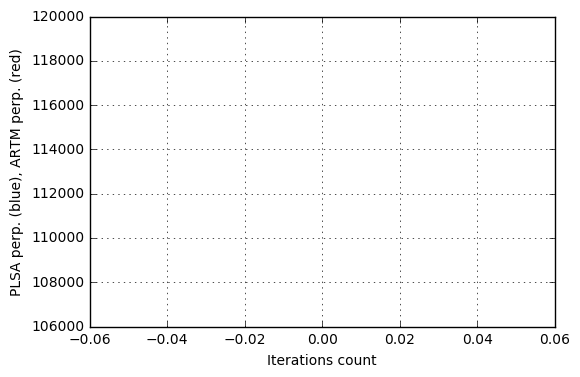

In [10]:
plt.plot(xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA perp. (blue), ARTM perp. (red)')
plt.grid(True)
plt.show()

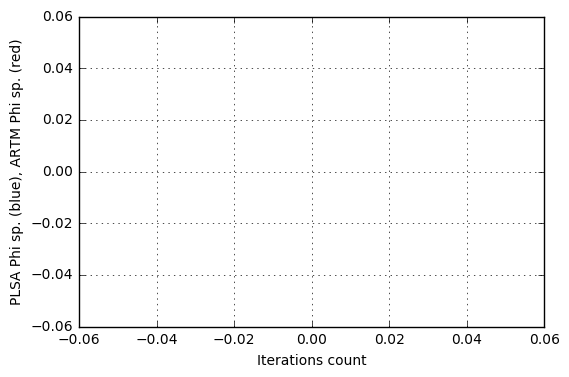

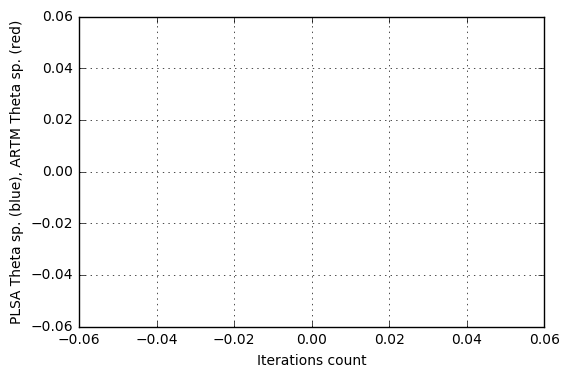

In [11]:
plt.plot(xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['SparsityPhiScore'].value, 'r--', linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA Phi sp. (blue), ARTM Phi sp. (red)')
plt.grid(True)
plt.show()

plt.plot(xrange(modelARTM.num_phi_updates), modelARTM.score_tracker['SparsityThetaScore'].value, 'r--', linewidth=2)
plt.xlabel('Iterations count')
plt.ylabel('PLSA Theta sp. (blue), ARTM Theta sp. (red)')
plt.grid(True)
plt.show()

In [12]:
with io.open(BigARTMCorpusDir+subd+"\\LDA_topics"+'\\100.topics','w',encoding='utf8') as outputTopics:
    try:
        for topic_name in modelARTM.topic_names:
            print topic_name + ': ',
            print modelARTM.score_tracker['TopTokensScore'].last_tokens
    except Exception as e:
        print(e)
    outputTopics.close()

topic_0:  {}
topic_1:  {}
topic_2:  {}
topic_3:  {}
topic_4:  {}
topic_5:  {}
topic_6:  {}
topic_7:  {}
topic_8:  {}
topic_9:  {}
topic_10:  {}
topic_11:  {}
topic_12:  {}
topic_13:  {}
topic_14:  {}
topic_15:  {}
topic_16:  {}
topic_17:  {}
topic_18:  {}
topic_19:  {}
topic_20:  {}
topic_21:  {}
topic_22:  {}
topic_23:  {}
topic_24:  {}
topic_25:  {}
topic_26:  {}
topic_27:  {}
topic_28:  {}
topic_29:  {}
topic_30:  {}
topic_31:  {}
topic_32:  {}
topic_33:  {}
topic_34:  {}
topic_35:  {}
topic_36:  {}
topic_37:  {}
topic_38:  {}
topic_39:  {}
topic_40:  {}
topic_41:  {}
topic_42:  {}
topic_43:  {}
topic_44:  {}
topic_45:  {}
topic_46:  {}
topic_47:  {}
topic_48:  {}
topic_49:  {}
topic_50:  {}
topic_51:  {}
topic_52:  {}
topic_53:  {}
topic_54:  {}
topic_55:  {}
topic_56:  {}
topic_57:  {}
topic_58:  {}
topic_59:  {}
topic_60:  {}
topic_61:  {}
topic_62:  {}
topic_63:  {}
topic_64:  {}
topic_65:  {}
topic_66:  {}
topic_67:  {}
topic_68:  {}
topic_69:  {}
topic_70:  {}
topic_71:  {}
to

In [13]:
print modelARTM.phi_

                               topic_0   topic_1       topic_2       topic_3  \
ХИБДЖАБА                  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
АЛЯ-НУГАЙМИСЬ             0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
ЗАРИФ                     0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
РЕЧЬ                      3.665391e-04  0.000678  3.413862e-04  2.381968e-04   
ПРОКЛЯТЫЙ                 4.701714e-11  0.000000  8.543309e-09  1.913491e-04   
МАНТИЯЦЕРК                0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
ОТСТУПИТЬ                 5.951928e-09  0.000000  1.276647e-04  7.576410e-05   
СВОЮЗЛОБА                 0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
ПАРТНЁР                   2.781891e-13  0.000000  1.153417e-14  0.000000e+00   
ГЕОПОЛИТИЧЕСКИЙ           9.005212e-12  0.000000  4.669471e-14  0.000000e+00   
ТУХВАТУЛЛИН               0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
КИНО                      1.742897e-16  

In [ ]:
batch_vectorizer = artm.BatchVectorizer(data_path=BigARTMCorpusDir+subd+"\\"+"vowpal_wabbit_pos\\"+"statsClassIdFree.vwwbbbt",
                                                    data_format='vowpal_wabbit',
                                                    target_folder=BigARTMCorpusDir+subd+"\\"+"batches_pos_classidfree")